In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#use seaborn plotting style defaults
import seaborn as sns; sns.set()
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score

from sklearn import svm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.csv to Dry_Bean_Dataset.csv


In [4]:
#read cvs file into dataframe
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [6]:
print(df.head())
df.columns
print(df.head(n=25))

    Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1  28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2  29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3  30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4  30140    620.134       201.847882  ...      0.941900      0.999166  SEKER

[5 rows x 17 columns]
     Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0   28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1   28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2   29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3   30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4   30140    620.134       201.847882  ...      0.941900      0.999166  SEKER
5   30279    634.927       212.560556  ...     

In [7]:
df=df[:5000]

df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
df.dtypes
df.Class.unique()

labels, levels = pd.factorize(df['Class'])
df['Class'] = labels
df.head(5)

Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724      0
1  28734    638.018       200.524796  ...      0.909851      0.998430      0
2  29380    624.110       212.826130  ...      0.825871      0.999066      0
3  30008    645.884       210.557999  ...      0.861794      0.994199      0
4  30140    620.134       201.847882  ...      0.941900      0.999166      0

[5 rows x 17 columns]

In [9]:
from sklearn.decomposition import PCA

standard_deviations = 3


from scipy import stats

def drop_numerical_outliers(df, z_thresh=2):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)    

In [10]:
#Drop classifier
Y= df['Class']

df.drop(['Class',],axis=1,inplace=True)

In [11]:
for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')

In [13]:
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

#bservations and variables
observations = list(df.index)
variables = list(df.columns)

for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')
       
df = (df - df.mean())/df.std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3788 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3788 non-null   int64  
 1   Perimeter        3788 non-null   float64
 2   MajorAxisLength  3788 non-null   float64
 3   MinorAxisLength  3788 non-null   float64
 4   AspectRation     3788 non-null   float64
 5   Eccentricity     3788 non-null   float64
 6   ConvexArea       3788 non-null   int64  
 7   EquivDiameter    3788 non-null   float64
 8   Extent           3788 non-null   float64
 9   Solidity         3788 non-null   float64
 10  roundness        3788 non-null   float64
 11  Compactness      3788 non-null   float64
 12  ShapeFactor1     3788 non-null   float64
 13  ShapeFactor2     3788 non-null   float64
 14  ShapeFactor3     3788 non-null   float64
 15  ShapeFactor4     3788 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 503.1 KB


In [14]:
#Centering data
df = (df - df.mean())/df.std()

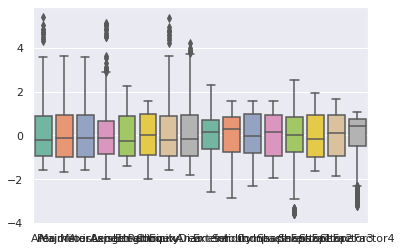

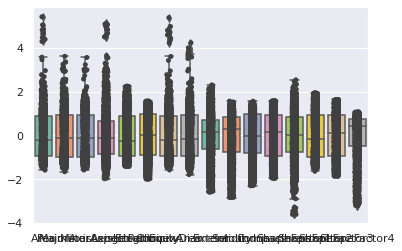

In [15]:
#visualisation of the data using a box plot
sns.boxplot(data=df, orient="v", palette="Set2")

##Use swarmplot() or stripplot to show the datapoints on top of the boxes:
plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

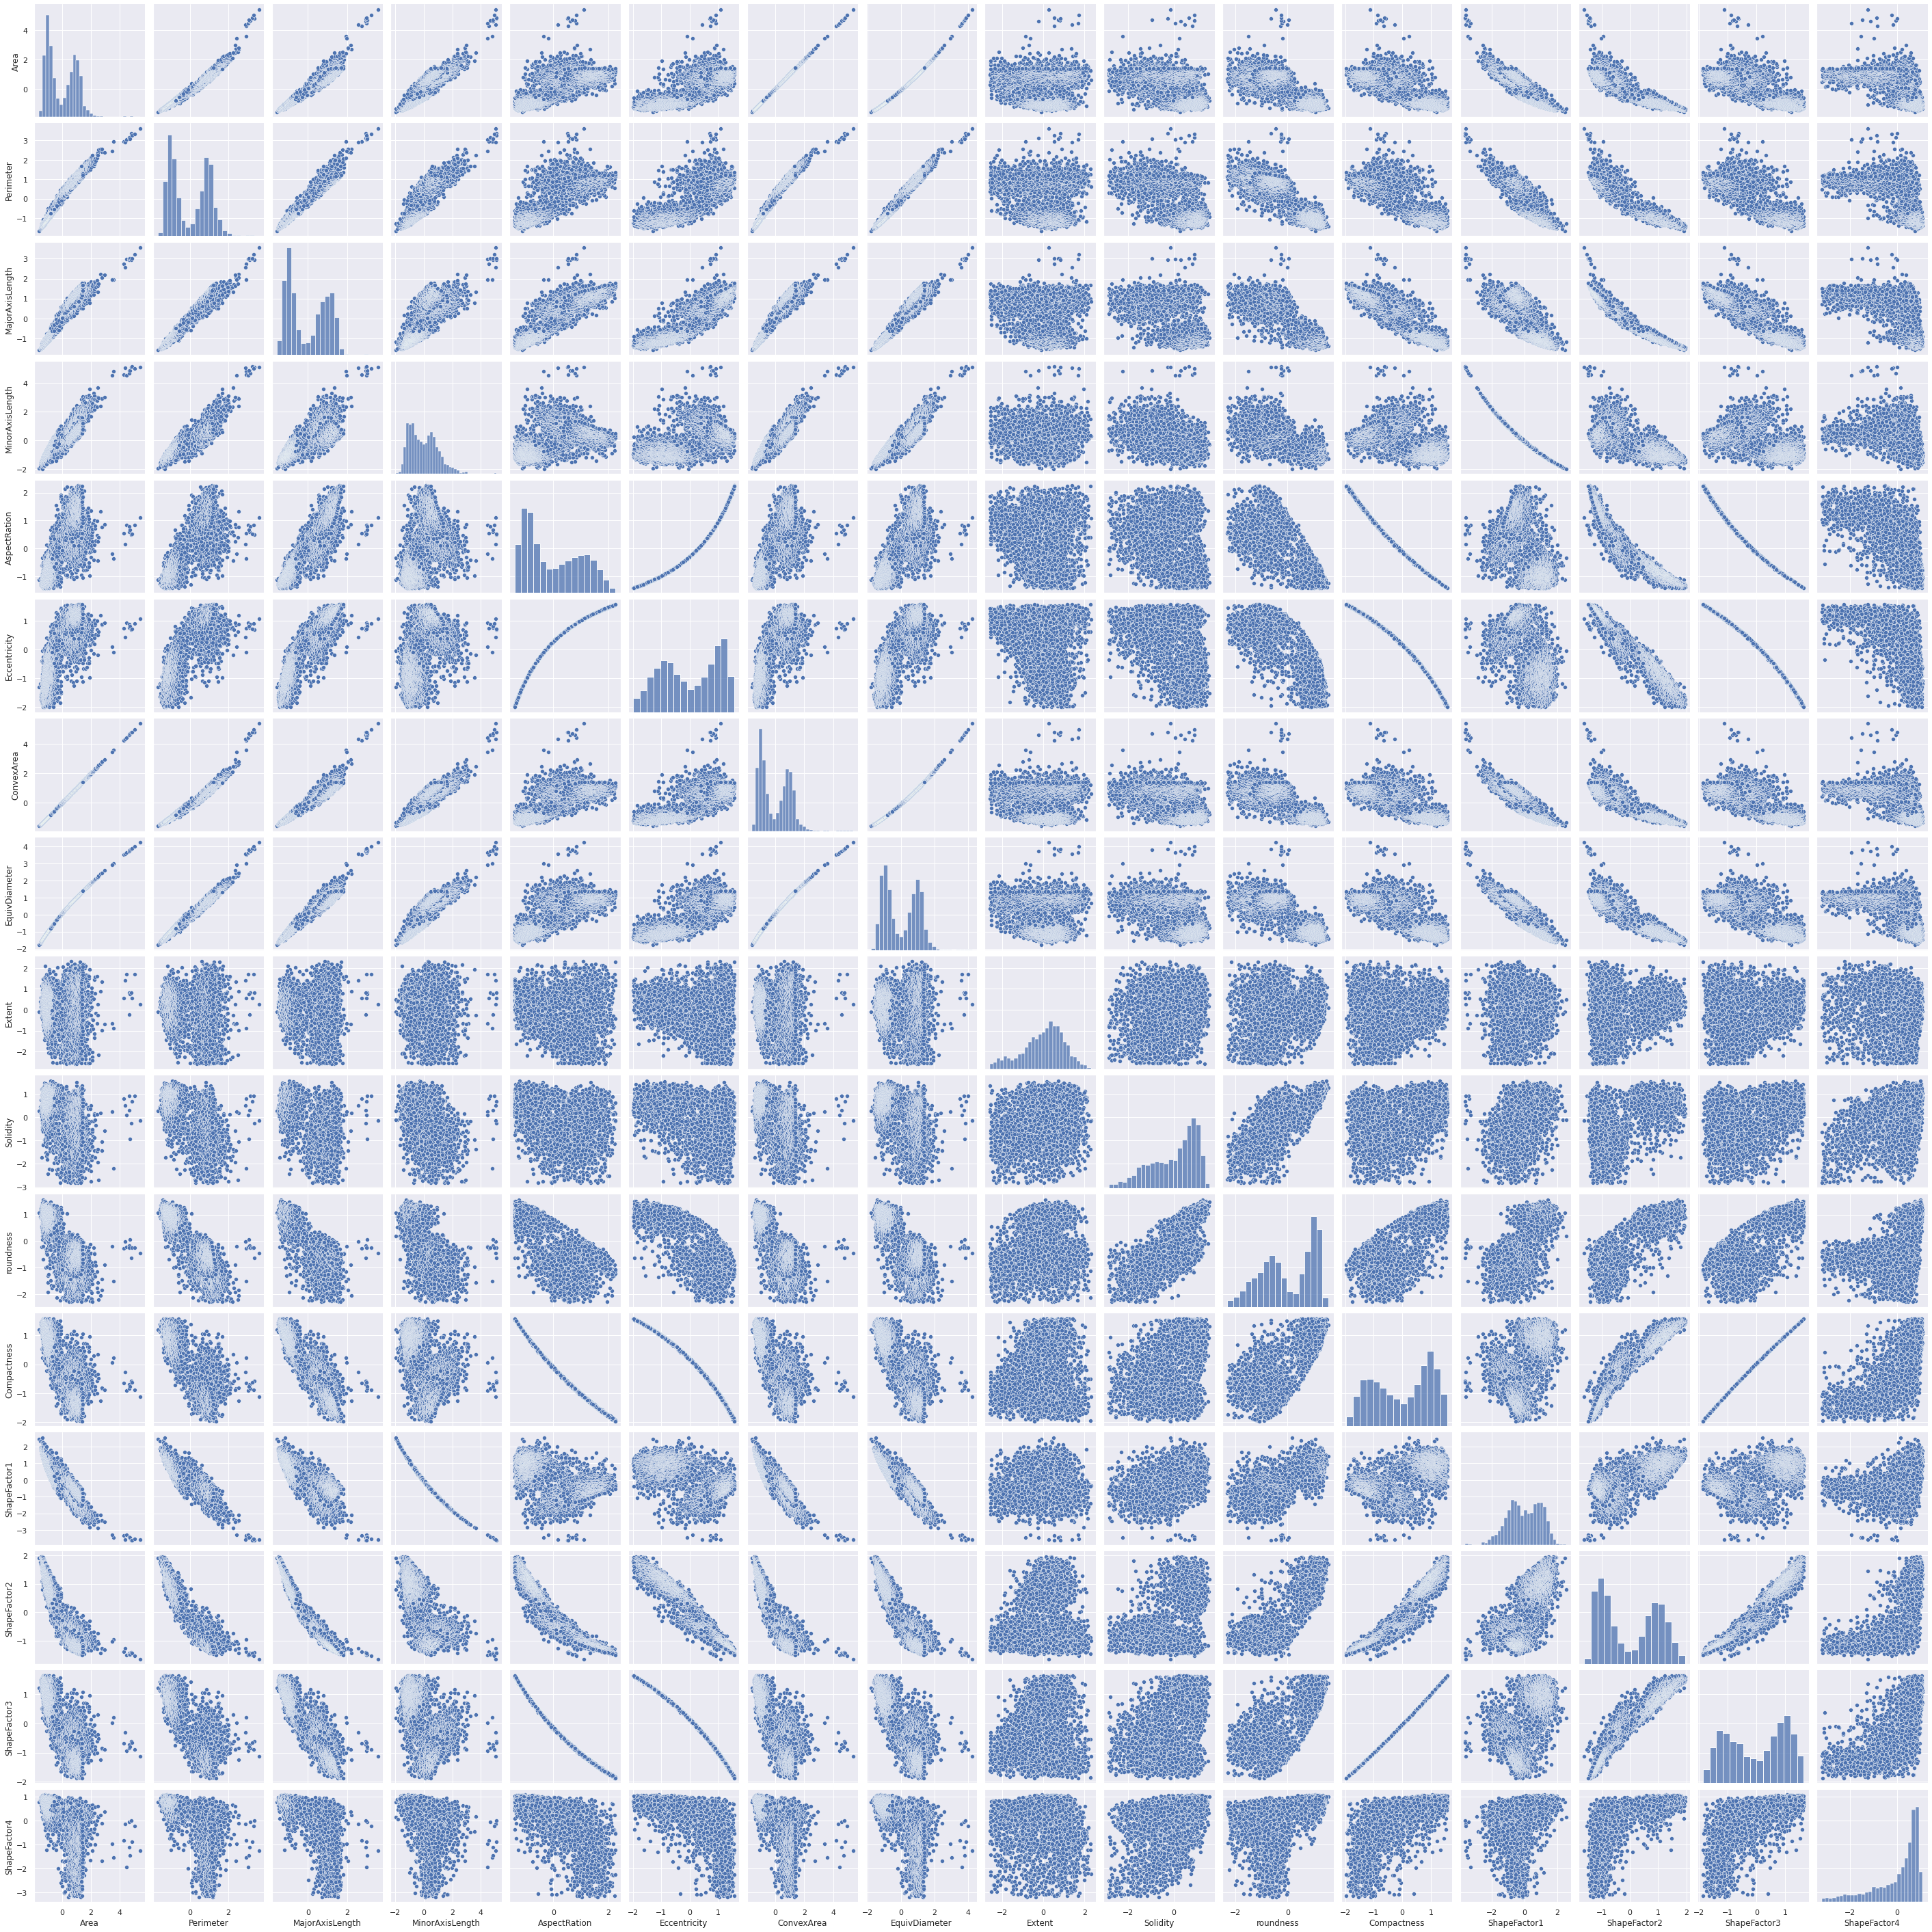

In [16]:
#PairPlot
sns.pairplot(df)

In [18]:
from sklearn.metrics import classification_report

Text(0.5, 1.0, 'Covariance matrix')

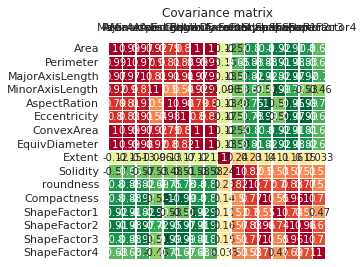

In [19]:
#COVARIANCE
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

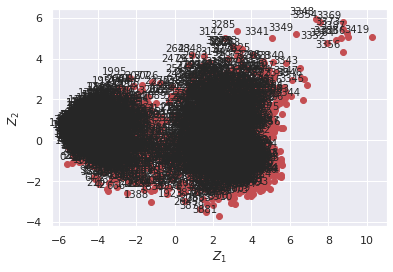

In [20]:
#Principal component analysis
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

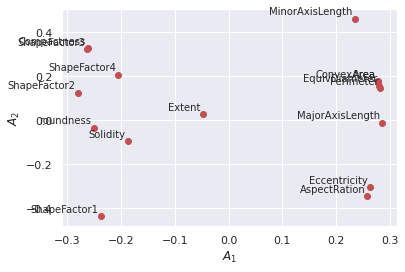

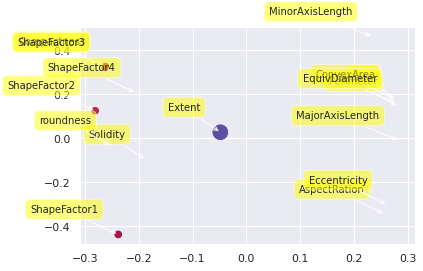

In [21]:
#Eigenvectors
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')




plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


Text(0, 0.5, 'Explained variance')

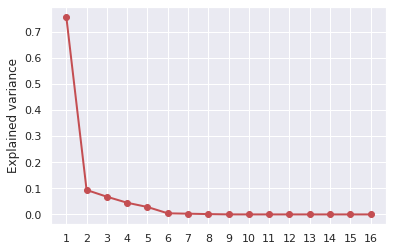

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 


Text(0, 0.5, 'Cumulative explained variance')

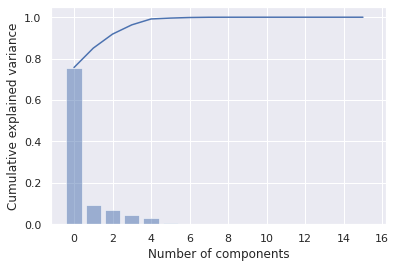

In [23]:

#Explaiend Variance
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


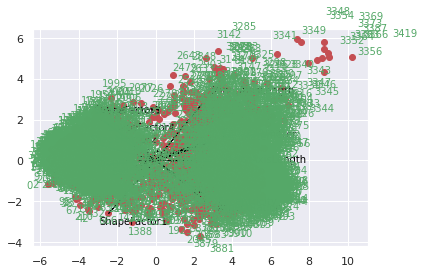

In [24]:

#Biplot
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='black', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='black')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='g')



Text(0.5, 1.0, 'Principal components')

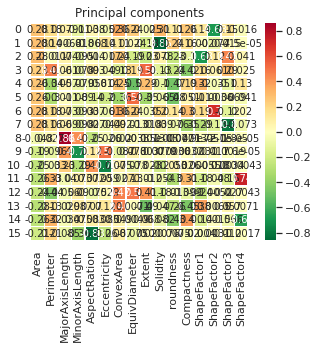

In [25]:
#Principal components
plt. figure()
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

In [26]:
# Machine Learning
print('\n')
print('LogisticRegression with StandardScaler prediction results ---->\n')
   

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#discplay coefficients
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
pipe_prediction = pipe.predict(X_test)


# # But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(pipe_prediction, y_test))
print(classification_report(pipe_prediction, y_test))





LogisticRegression with StandardScaler prediction results ---->

0.9564643799472295
[[365   4   0]
 [  2 203  12]
 [  3  12 157]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.93      0.94      0.93       217
           3       0.93      0.91      0.92       172

    accuracy                           0.96       758
   macro avg       0.95      0.95      0.95       758
weighted avg       0.96      0.96      0.96       758



In [27]:
print('\n')
print('svm prediction results ---->\n')
   
SVC_model = svm.SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test))
print(confusion_matrix(SVC_prediction, y_test))


print('\n')
print('KNeighborsClassifier prediction results ---->\n')
   


KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)


print(accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))



svm prediction results ---->

0.9656992084432717
[[366   3   0]
 [  3 206   9]
 [  1  10 160]]


KNeighborsClassifier prediction results ---->

0.9696569920844327
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       372
           1       0.92      0.97      0.95       208
           3       0.98      0.93      0.95       178

    accuracy                           0.97       758
   macro avg       0.96      0.96      0.96       758
weighted avg       0.97      0.97      0.97       758

